# Cài đặt và minh hoạ thuật toán Stochastic Gradient Descent

Tác giả: Phạm Quang Nhật Minh (FTRI)

## Giới thiệu

Trong notebook này, chúng tôi sẽ cài đặt thuật toán Gradient Descent, Stochastic Gradient Descent (SGD), Mini-Batch Gradient Descent và thử nghiệm trên dữ liệu phân lớp. Chúng tôi sẽ so sánh thuật toán SGD với thuật toán Gradient Descent thông thường.

## Dữ liệu

Bài tập sẽ sử dụng dữ liệu trong file ```ex2data1.txt```. Bài toán đặt ra như sau. Giả sử bạn là một người quản lý đầu vào tại một trường đại học. Bạn muốn xác định khả năng một thí sinh được nhận vào học dựa trên kết quả của 2 kỳ thi. Bạn có dữ liệu trong quá khứ của các thí sinh để làm dữ liệu huấn luyện cho thuật toán Logistic Regression. Với mỗi ví dụ trong dữ liệu huấn luyện, bạn có điểm thi của 2 kì thi của thí sinh và giá trị quyết định xem thí sinh đó có được nhận hay không.

### Khám phá dữ liệu

Tôi sẽ đọc dữ liệu với thư viện ```pandas``` và vẽ các đồ thị trên dữ liệu.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('./ex2data1.txt', dtype=np.float64, header=None)

df.head()

,0,1,2
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0


Bảng ở trên hiển thị một số ví dụ trong dữ liệu huấn luyện. Các hàng của ma trận $X$ tương ứng với các ví dụ, các cột tương ứng với các đặc trưng (ở đây là hai điểm số).

Trước khi cài đặt một thuật toán học máy nào, bạn nên vẽ đồ thị để khám phá dữ liệu. Đoạn code dưới đây sẽ hiển thị 2-D plot thể hiện mối quan hệ giữa 2 điểm thi của các thí sinh.

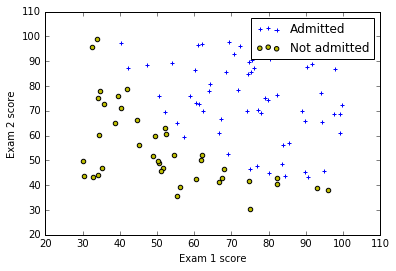

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = df.iloc[:,0:2]
y = df.iloc[:,2]

def plot_data(X, y):
    # indexes of admitted and not admitted students
    pos = y == 1
    neg = y == 0
    plt.scatter( X.loc[pos,0], X.loc[pos,1], marker='+', c='b')
    plt.scatter( X.loc[neg,0], X.loc[neg,1], c='y')
    return plt

plt = plot_data(X, y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend( ('Admitted', 'Not admitted'), loc = 'upper right' )  
plt.show()

Sau khi đọc dữ liệu vào các biến $X$ và $y$, ta cần thêm các "intercept term" vào ma trận $X$ và khởi tạo giá trị ban đầu của $\theta$

## Logistic Regression và thuật toán tối ưu gradient descent

Logistic Regression (LR) là một thuật toán được sử dụng trong bài toán phân lớp. Khác với linear regression, logistic regression sử dụng hàm sigmoid function để định nghĩa hypothesis function. Ký hiệu $x$ là vector đặc trưng. Hàm hypothesis trong Logistic Regression được định nghĩa như sau.

$$h_\theta(x) = g(\theta^Tx)$$

trong đó $g$ là hàm sigmoid, $\theta$ là vector trọng số tương ứng với các đặc trưng trong $x$. Hàm sigmoid được định nghĩa như sau:

$$g(z)=\frac{1}{1+e^{-z}}$$

Trong bài toán phân lớp, chúng ta có một tập huấn luyện (training data) bao gồm các ví dụ (vector đặc trưng) và nhãn tương ứng.

$$\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\cdots,(x^{(m)},y^{(m)})\}$$

Khi huấn luyện mô hình logistic regression, chúng ta cần tìm vector trọng số $\theta$ sao cho khi áp dụng chính mô hình trên dữ liệu training, độ mất mát (cost) là nhỏ nhất. Trong logistic regression, hàm giá (cost function) được định nghĩa như sau:

$$J(\theta) =\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\right]$$

Ta cần tìm $\theta$ để cực tiểu hàm giá trên. Để tìm cực tiểu cost function, chúng ta dùng thuật toán gradient descent bằng cách di chuyển dần từ một vị trí ban đầu tới điểm cực tiểu theo ngược phương với phương tiếp tuyến tại vị trí hiện tại. Để tìm $\theta$ ta có thể áp dụng thuật toán "batch gradient descent". Tại mỗi vòng lặp, ta thực hiện việc cập nhật tham số sau đây.

Repeat {

$\theta_j = \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)$

}

Trong đó, ta cập nhật đồng thời các giá trị $\theta_{j}$ với mọi $j$. 

Gradient của cost function là 1 vector có cùng độ dài với $\theta$ trong đó phần tử $j^{th}$ (với $j=0,1,\cdots,n$) được định nghĩa như sau:

$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$

Như vậy tại mỗi vòng lặp, chúng ta sẽ thực hiện việc cập nhật tham số sau đây:

Repeat {

$\theta_j = \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$

}

Như vậy về cơ bản, trong thuật toán **batch gradient descent**, tại mỗi vòng lặp, chúng ta phải tính gradient bằng cách duyệt qua toàn bộ các example có trong dữ liệu huấn luyện.

Trước khi cài đặt thuật toán gradient descent, ta cần cài đặt hàm tính cost function và hàm tính gradient.

In [5]:
# z can be np.ndarray, np.matrix, or scalar
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z) ) 

# X.shape m x n
# theta.shape n x 1
# y.shape m x 1
def cost_function(theta, X, y):
    m = y.shape[0]
    J = 0
    hx = sigmoid( np.dot(X, theta) ) # hx.shape m x 1
    J = np.sum( -y * np.log(hx) - (1-y) * np.log(1-hx) )/m
    return J

# gradient function
def gradient(theta, X, y):
    m = y.shape[0]
    grad_ = np.zeros( theta.shape[0] )
    hx = sigmoid( np.dot(X, theta) ) # hx.shape m x 1
    grad_ = np.dot(X.T, hx - y) / m
    return grad_

Trước khi fit tham số $\theta$ bằng dữ liệu đã cho, ta cần thêm các "intercept term" vào ma trận $X$ và khởi tạo giá trị ban đầu của $\theta$.

In [6]:
m, n = X.shape
print (m, n)

X = np.concatenate( ( np.ones( (m, 1) ), X ), axis=1 )
initial_theta = np.zeros(n + 1)
X.shape

100 2


(100, 3)

Sau khi định nghĩa hàm ```cost_function```, ta sẽ tính giá trị của cost function với giá trị khởi tạo ban đầu của $\theta$. Kết quả thu được của cost khoảng $0.693$.

In [7]:
cost = cost_function(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print(X.shape)
print(y.shape)
print(initial_theta)
print('Cost at initial theta (zeros): %f' % cost)
print('Gradient at initial theta (zeros):\n%s' % grad)

(100, 3)
(100,)
[ 0.  0.  0.]
Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]


Đoạn code dưới đây sẽ cài đặt thuật toán **batch gradient descent**. Chú ý, ở đây ```J_history``` được sử dụng để lưu giá trị hàm giá sau mỗi vòng lặp. Giá trị này sẽ được dùng để vẽ đồ thị liên hệ giữa số vòng lặp với hàm giá và chúng ta sẽ quan sát được độ giảm của hàm giá khi số vòng lặp tăng lên.

Nhắc lại công thức cập nhật tham số trong mỗi vòng lặp như sau.

Repeat {

$\theta_j = \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$

}

In [8]:
# alpha là learning rate
# num_iters là số vòng lặp
def gradient_descent(X, y, initial_theta, alpha, num_iters):
    m = y.shape[0]
    n = X.shape[1]
    theta = np.array(initial_theta)
    J_history = np.zeros(num_iters)

    for iter in range(num_iters):
        temp = sigmoid( np.dot(X, theta) ) - y
        for j in range(n):
            delta = 0.0
            for i in range(m):
                delta += temp[i] * X[i,j]
            theta[j] -= alpha * delta/m
        J_history[iter] = cost_function(theta, X, y)
        
    return theta, J_history

Chúng ta sẽ tính $\theta$ bằng cách "fit" dữ liệu với hàm ```gradient_descent``` được định nghĩa ở trên.

In [10]:
alpha = 0.001
num_iters = 5000

theta, J_history = gradient_descent(X, y, initial_theta, alpha, num_iters)
print("Theta = %s" % theta)
print('Cost at theta (found by fmin): %f' % cost_function(theta, X, y))

# We can use fmin function in scipy.optimize module to calculate theta
# from scipy.optimize import fmin_bfgs, fmin
# theta = fmin( cost_function, initial_theta, args=(X,y) )

Theta = [-0.34165779  0.01280173  0.00310974]
Cost at theta (found by fmin): 0.606459
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


### Đánh giá độ chính xác của mô hình trên dữ liệu huấn luyện

Sau khi học các tham số $\theta$, chúng ta có thể sử dụng mô hình đã học để tính xác suất một sinh viên trúng tuyển. Ví dụ: Tính xác suất một sinh viên với điểm thi 1 là 45, điểm thi 2 là 85. Đoạn code sau sẽ thực hiện công việc đó:

In [457]:
st = np.array( [1, 45, 85] )
prob = sigmoid( np.dot(theta, st) )
print('Xác suất sinh viên (với điểm số 45, 85) trúng tuyển: %f' % prob)

Xác suất sinh viên (với điểm số 45, 85) trúng tuyển: 0.622165


Một cách để đánh giá chất lượng của các số học từ dữ liệu là đánh giá độ chính xác của dự đoán trên dữ liệu huấn luyện sử dụng các tham số này. Để thực hiện công việc này, trước tiên, chúng ta sẽ cài đặt hàm ```predict``` -- hàm trả về các giá trị 1 và 0 với dữ liệu và tham số $\theta$.

In [458]:
# theta.shape = (n,)
# X.shape = (m, n)
# should return an array with shape (m,)
def predict(theta, X):
    hx = np.dot(X, theta)
    hx[hx >= 0.5] = 1
    hx[hx < 0.5] = 0
    
    return hx

Chúng ta sẽ sử dụng hàm ```predict``` để tính độ chính xác trên dữ liệu huấn luyện.

In [459]:
p = predict(theta, X)
print('Train accuracy: %s' % ( 100 * (p == y).mean() ))

Train accuracy: 82.0


### Vẽ đồ thị hội tụ (convergence graph)

Chúng ta có thể muốn quan sát xem hàm giá giảm như thế nào sau các vòng lặp. Chúng ta sẽ sử dụng các giá trị lưu trong ```J_history```.

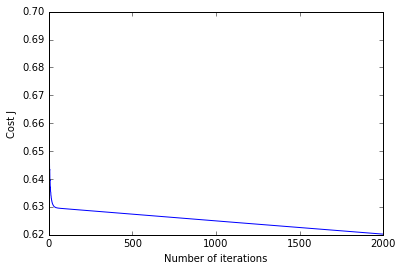

In [460]:
niters = 2000
# Plot the convergence graph
plt.plot( range(1, niters + 1), J_history[0:niters] )
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.show()

Có thể thấy, khi số vòng lặp tăng lên thì giá trị của cost function cũng giảm đi.

## Thuật toán tối ưu Stochastic Gradient Descent

Trong thuật toán Gradient Descent, tại mỗi bước cập nhật tham số, chúng ta sẽ phải duyệt qua toàn bộ các examples trong dữ liệu huấn luyện. Điều này có thể tốn kém nếu số lượng examples trong dữ liệu huấn luyện là rất lớn. Trong thuật toán Stochastic Gradient Descent (SGD), chúng ta sẽ duyệt lần lượt duyệt từng ví dụ và cập nhật tham số theo lỗi tương ứng với chỉ example đó. Thông thường, thuật toán SGD sẽ đạt đến giá trị $\theta$ gần với giá trị tối ưu nhanh hơn so với thuật toán **batch gradient descent**.

Thuật toán SGD sẽ cập nhật tham số như sau:

Loop {

for i=1 to m, {

   $\theta_j = \theta_j - \alpha\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$ (for every $j$)
   
}

}

Đoạn mã sau đây sẽ cài đặt thuật toán Stochastic Gradient Descent (SGD)

In [461]:
def SGD(X, y, initial_theta, alpha, num_iters):
    m = y.shape[0]
    n = X.shape[1]
    theta = np.zeros(n)
    J_history = np.zeros(num_iters)

    for iter in range(num_iters):
        # Randomize dữ liệu
        for i in range(m):
            error = sigmoid( np.dot(theta, X[i,:]) ) - y[i] 
            gradient = X[i,:].dot(error)
            theta -= alpha * gradient
        J_history[iter] = cost_function(theta, X, y)
        
    return theta, J_history

In [462]:
initial_theta = np.zeros(X.shape[1] + 1)
alpha = 0.001
num_iters = 5000
theta, J_history = SGD(X, y, initial_theta, alpha, num_iters)
print("Theta = %s" % theta)
print('Cost at theta (found by fmin): %f' % cost_function(theta, X, y))

Theta = [-19.44333201   0.19833455   0.17474059]
Cost at theta (found by fmin): 0.623321


Tương tự như trên, ta cũng đánh giá khả năng fit dữ liệu của mô hình bằng cách tính độ chính xác trên dữ liệu huấn luyện.

In [463]:
st = np.array( [1, 45, 85] )
prob = sigmoid( np.dot(theta, st) )
print('Xác suất sinh viên (với điểm số 45, 85) trúng tuyển: %f' % prob)

p = predict(theta, X)
print('Train accuracy: %s' % ( 100 * (p == y).mean() ))

Xác suất sinh viên (với điểm số 45, 85) trúng tuyển: 0.987063
Train accuracy: 78.0


Đồ thị hội tụ trong trường hợp dùng SGD.

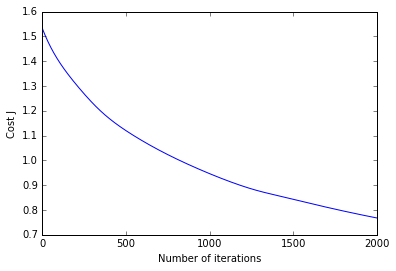

In [464]:
niters = 2000
# Plot the convergence graph
plt.plot( range(1, niters + 1), J_history[0:niters] )
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.show()

## Thuật toán mini-batch gradient descent

Thuật toán **mini-batch gradient descent** tận dụng những ưu điểm của cả 2 thuật toán **batch gradient descent** và **stochastic gradient descent**. Thuật toán này sẽ thực hiện việc cập nhật với mỗi *mini-batch* gồm *k* ví dụ huấn luyện (training examples).

Thuật toán mini-batch gradient được cài đặt trong ngôn ngữ Python như sau:

In [465]:
def mini_batch_gd(X, y, initial_theta, alpha, num_iters, batch_size):
    m = y.shape[0]
    n = X.shape[1]
    theta = np.zeros(n)
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        # TO-DO: implement randomized data
        for i in range(0, m, batch_size):
            batchX = X[i:i+batch_size,:]
            batchY = y[i:i+batch_size]
            error = sigmoid( np.dot(batchX, theta) ) - batchY
            gradient = batchX.T.dot(error)/batch_size
            theta -= alpha * gradient
        J_history[iter] = cost_function(theta, X, y)
        
    return theta, J_history

In [466]:
alpha = 0.0001
num_iters = 5000
theta, J_history = mini_batch_gd(X, y, initial_theta, alpha, num_iters, 5)
print("Theta = %s" % theta)
print('Cost at theta (found by fmin): %f' % cost_function(theta, X, y))

Theta = [-0.67411132  0.01931192  0.00946836]
Cost at theta (found by fmin): 0.612518


Đánh giá mô hình đã học và vẽ đồ thị hội tụ.

In [467]:
st = np.array( [1, 45, 85] )
prob = sigmoid( np.dot(theta, st) )
print('Xác suất sinh viên (với điểm số 45, 85) trúng tuyển: %f' % prob)

p = predict(theta, X)
print('Train accuracy: %s' % ( 100 * (p == y).mean() ))

Xác suất sinh viên (với điểm số 45, 85) trúng tuyển: 0.731007
Train accuracy: 65.0


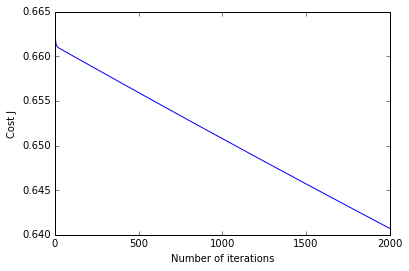

In [468]:
niters = 2000
# Plot the convergence graph
plt.plot( range(1, niters + 1), J_history[0:niters] )
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.show()

Xem thêm phân tích về thuật toán Stochastic Gradient Descent tại [đây](sebastianruder.com/optimizing-gradient-descent/index.html).

## Sử dụng thư viện scikit-learn

Trong phần này, chúng ta sẽ sử dụng thư viện scikit-learn để học mô hình từ dữ liệu. Chúng tôi sử dụng class ```LogisticRegression```.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('./ex2data1.txt', dtype=np.float64, header=None)
X = df.iloc[:,0:2]
y = df.iloc[:,2]

clf = LogisticRegression(C=10, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Tính training accuracy.

In [3]:
train_acc = clf.score(X, y)
print('Training accuracy = %0.2f' % train_acc)

Training accuracy = 0.89


Có thể thấy khi sử dụng thư viện chuẩn LogisticRegression, chúng ta có thể "fit" rất tốt dữ liệu huấn luyện.

Sau đây chúng ta sẽ thử sử dụng lớp ```SGDClassifier``` (Xem [http://scikit-learn.org/stable/modules/sgd.html](http://scikit-learn.org/stable/modules/sgd.html)) để fit dữ liệu huấn luyện.

In [4]:
clf = SGDClassifier(loss='log', n_iter=6000, random_state=100)
clf.fit(X, y)
train_acc = clf.score(X, y)
print('Training accuracy = %0.2f' % train_acc)

Training accuracy = 0.92


## Kết luận

Trong tài liệu này, chúng ta đã thử cài đặt các 3 thuật toán:

- Gradient Descent
- Stochastic Gradient Descent (SGD)
- Mini-batch gradient descent

Thuật toán **mini-batch gradient descent** được sử dụng khá nhiều khi huấn luyện mạng Neural và trong trường hợp số lượng ví dụ huấn luyện là rất lớn. Tuy nhiên để có thể tận dụng được sức mạnh của thuật toán này, chúng ta phải sử dụng các kỹ thuật vectorization khi cài đặt. Điều này có thể làm được nếu chúng ta dùng thư viện python numpy.

## Tham khảo

1. [Stochastic Gradient Descent (SGD) with Python](http://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/)
2. [An Introduction to Gradient Descent and Linear Regression](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/), by Matt Nedrich.
3. Learning with large data sets (video lecture), by Andrew Ng: [http://tinyurl.com/jcc4ycv](http://tinyurl.com/jcc4ycv).
4. On overview of gradient descent optimization algorithms, by  Sebastian Ruder: [http://tinyurl.com/zf7aqsd](http://tinyurl.com/zf7aqsd).
5. Section 5.9, Stochastic Gradient Descent: [http://www.deeplearningbook.org/contents/ml.html](http://www.deeplearningbook.org/contents/ml.html)
6. Stochastic Gradient Descent (SGD) library in scikit-learn: [http://scikit-learn.org/stable/modules/sgd.html](http://scikit-learn.org/stable/modules/sgd.html).
7. [Theano basic tutorial](http://deeplearning.net/software/theano/tutorial)
8. [Deep Learning Tutorials using Theano](http://deeplearning.net/tutorial)